# P2: Analyzing the NYC Subway Dataset
Projection Submission  
David Smith  
September 17, 2015  
  
### Overview
This project consists of two parts. In Part 1 of the project, you should have completed the questions in Problem Sets 2, 3, and 4 in the Introduction to Data Science course.  
  
This document addresses part 2 of the project. Please use this document as a template and answer the following questions to explain your reasoning and conclusion behind your work in the problem sets. You will attach a document with your answers to these questions as part of your final project submission.

### Section 0. References

Please include a list of references you have used for this project. Please be specific - for example, instead of including a general website such as stackoverflow.com, try to include a specific topic from Stackoverflow that you have found useful.
 
* [Sizing bin widths](http://stackoverflow.com/questions/28101623/python-pyplot-histogram-adjusting-bin-width-not-number-of-bins) @ Stack Overflow (appears to be related to this data set)
* I found this [Udacity Webcast](https://discussions.udacity.com/t/webcast-understanding-the-mann-whitney-u-test/25646) incredibly helpful in understanding the Mann-Whitney U-test
* I reviewed [this Udacity PDF document](https://storage.googleapis.com/supplemental_media/udacityu/649959144/MannWhitneyUTest.pdf) to learn more about Mann-Whitney
* I consulted [this Udacity forum discussion](https://discussions.udacity.com/t/p1-hypothesis-test-restricted-to-rain/23950/13) and [this one](https://discussions.udacity.com/t/mann-whitney-u-test-question-p3-3-spoilers/31550/6) for more insight into interpreting Mann-Whitney
* [Goodness-of-Fit](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) for linear regression models...how to interpret R2
* [More on interpreting R2](http://blog.minitab.com/blog/adventures-in-statistics/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables)

In [19]:
%matplotlib inline 
import numpy as np
import pandas
import matplotlib.pyplot as plt
from ggplot import *
import ggplot
import pandas
from datetime import datetime
import scipy
import scipy.stats
turnstile_weather = pandas.read_csv('turnstile_weather_v2.csv')

### Section 1. Statistical Test

#### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value? 

* I used the Mann-Whitney U-test to analyze the NYC subway data, with a two-tail P value
* Null Hypothesis: The probability that Rain ridership is greater than No Rain ridership is equal to 50%, meaning the distributions of the populations are the same  
* P-critical value: 0.05

#### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.  

The Mann-Whitney U-test applies because the data is not normally distributed. The histogram displayed in the answer to Question 3.1 below displays the frequency of ridership during rainy days and non-rainy days. The histograms show that the data is not normally distributed. Instead, there is a single tail out to the right in both samples. Therefore, Welch's T-test is not the most appropriate for comparing the No Rain and Rain samples since it assumes an approximately normal distribution. Instead, the Mann-Whitney U-test is better suited to compare these samples in a non-parametric manner. 

Because Mann-Whitney is non-parametric, we then need to use descriptive statistics to assess the difference between the samples, i.e., which one has a higher mean or median.

#### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

In [20]:
with_rain_mean = turnstile_weather[turnstile_weather['rain'] == 1].ENTRIESn_hourly.mean()
with_rain_median = turnstile_weather[turnstile_weather['rain'] == 1].ENTRIESn_hourly.median()
without_rain_mean = turnstile_weather[turnstile_weather['rain'] == 0].ENTRIESn_hourly.mean()
without_rain_median = turnstile_weather[turnstile_weather['rain'] == 0].ENTRIESn_hourly.median()
mwu = scipy.stats.mannwhitneyu(turnstile_weather[turnstile_weather['rain'] == 1].ENTRIESn_hourly, turnstile_weather[turnstile_weather['rain'] == 0].ENTRIESn_hourly)
U = mwu[0]
p = mwu[1]
nx = len(turnstile_weather[turnstile_weather['rain'] == 1])
ny = len(turnstile_weather[turnstile_weather['rain'] == 0])
sigma = ((nx*ny*(nx+ny+1))/float(12)) ** (0.5)
mu = (nx*ny)/2
Z = (U - mu)/sigma
print "Mean with rain: " + "{:,.0f}".format(with_rain_mean)
print "Median with rain: " + "{:,.0f}".format(with_rain_median)
print "Mean without rain: " + "{:,.0f}".format(without_rain_mean)
print "Median without rain: " + "{:,.0f}".format(without_rain_median)
print "U-value: " + "{:,.0f}".format(U)
print "mu: " + "{:,.0f}".format(mu)
print "P-value: " + "{:.10f}".format(2*p)
print "Z-score: " + "{:.2f}".format(Z)

Mean with rain: 2,028
Median with rain: 939
Mean without rain: 1,846
Median without rain: 893
U-value: 153,635,120
mu: 158,459,220
P-value: 0.0000054821
Z-score: -4.55


Note: Since this is a two-tail P-value, I am multiplying it by 2 to get the result shown above.

#### 1.4 What is the significance and interpretation of these results?  
  
The distributions of the two samples are statistically different. We know this because the p-value is very, very small. The mean values show us *how* they are different: namely, that ridership *with* rain (mean 2,028) is higher than ridership *without* (1,846). 

In the pairwise comparisons between the two datasets done as part of the Mann-Whitney U-test, one sample of ridership numbers win much less often (mu = 153,635,120 times) than a 0.50 probability would suggest (U = 158,459,220 times). The tiny p-value of 0.0000054821--much less than our p-critical value of 0.05--includes the adjustment for the expected variance of this sample size. Another way of looking at is the large Z-score of -4.55, which indicates the number of standard deviations the observed U value is from the null hypothesis mean. Based on this evidence, we cannot accept the null hypothesis. In this case, the probability that Rain ridership is greater than No Rain ridership is something other than 0.50. 

Given this strong indication that the two samples have different distributions, we can look to a descriptive statistics to show which sample is winning the pairwise comparisons. The sample mean (2,028) and median (939) for Rainy days are higher than the respective values for Non-Rainy days (1,846 and 893, respectively). Therefore, it appears that the Rainy days are winning the Mann-Whitney pairwise ridership comparisons vs. Non-Rainy days more often.

### Section 2. Linear Regression

#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
OLS using Statsmodels 


#### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?


In [21]:
import statsmodels.api as sm
def linear_regression(features, values):

    features = sm.add_constant(features)
    model = sm.OLS(values,features) 
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    
    return intercept, params

def predictions(dataframe):

    features = dataframe[['rain', 'hour', 'meantempi', 'wspdi']]
    
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)

    dummy_units = pandas.get_dummies(dataframe['conds'], prefix='conds')
    features = features.join(dummy_units)
    
    dummy_units = pandas.get_dummies(dataframe['day_week'], prefix='dow')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    print params[0:4]
    return predictions

prds = predictions(turnstile_weather)


rain          49.337430
hour         120.695703
meantempi    -19.195956
wspdi         14.131602
dtype: float64


As shown in the code above, I used rain, hour, meantempi, wspdi as standard features. I used unit, conds, and day_week as dummy features.

#### 2.3 Why did you select these features in your model? 
*We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model. Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.” Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”*  

I experimented with many different combinations of weather-related features, based on my best guesses of meteorology and human behavior, to determine which ones had material effects. Ultimately, I included a few more factors besides rain, including wind speed (not the mean, but during that particular hour); and a dummy variable for the weather conditions. I had considered the amount of precipitation (precipi) and barametric pressure (meanpressurei), but reconsidered as those appear highly collinear with rain.

I then considered non-weather-related factors, leading me to the day of the week in addition to the subway station. I designated the day of the week as a dummy variable, as this was more predictive than using the numerical day of the week. This makes sense: weekend days Sunday (0) and Saturday (7) have the least ridership, as I visualize below in my answer to Question 3.2, which makes the numbers themselves somewhat meaningless. Better to treat this as a dummy. When I did so, the R-squared increased by roughly 2 whole percentage points.


#### 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?
  
* rain          49.337430
* hour         120.695703
* meantempi    -19.195956
* wspdi         14.131602

#### 2.5 What is your model’s R2 (coefficients of determination) value?

In [22]:
numer = np.sum(np.power(turnstile_weather.ENTRIESn_hourly - prds, 2))
denom = np.sum(np.power(turnstile_weather.ENTRIESn_hourly - np.mean(turnstile_weather.ENTRIESn_hourly), 2))
r_squared = 1 - numer/denom
print "R2=" + "{:.4f}".format(r_squared)

R2=0.4896


#### 2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?  
  
This value for R2 indicates that the model accounts for almost half of the variance in the observed data vs. predicted. The rest of the variance in observations is attributable to exogenous factors and randomness. Subway ridership in various weather conditions is largely a function of human behavior. Based on some [reading](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit), humans are harder to predict than, say, physical processes. As a result, R2 values of less than 50% are fairly common when analyzing human behavior. Therefore using this linear model to predict ridership seems appropriate for this dataset.

### Section 3. Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.  
#### 3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.
*You can combine the two histograms in a single plot or you can use two separate plots.
If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.
For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval. Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.*  

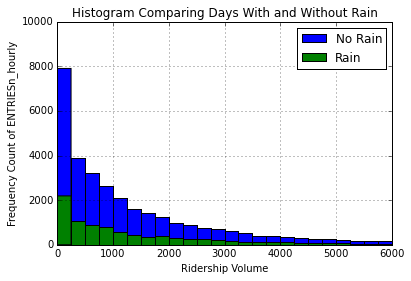

In [23]:
turnstile_weather = pandas.read_csv('turnstile_weather_v2.csv')
plt.figure()
plt.axis([0, 6000, 0, 10000])
binBoundaries = np.linspace(0,6000,25)

turnstile_weather[turnstile_weather['rain'] == 0].ENTRIESn_hourly.hist(bins=binBoundaries, label='No Rain') 
turnstile_weather[turnstile_weather['rain'] == 1].ENTRIESn_hourly.hist(bins=binBoundaries, label='Rain') 

plt.title('Histogram Comparing Days With and Without Rain')  
plt.xlabel('Ridership Volume')  
plt.ylabel('Frequency Count of ENTRIESn_hourly')  
plt.legend()

These overlapping histograms show that Rain and No Rain share similar distributions, with most of the observations falling at the lower end of the volume scale. In fact, many of the observations equal zero, accounting for the longest bars on the left. These histograms illustrate a lack of a normal distribution, meaning parametric tests like the Student or Welch's t-test are not appropriate for this data set, while a non-parametric test like the Mann-Whitney U-test can be applied. Beyond that, the larger No Rain bars illustrate that there are more data points in the No Rain sample than Rain; May 2011 had fewer days with rain than without in New York City.

### 3.2 One visualization can be more freeform. 
*You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:*  
* Ridership by time-of-day
* Ridership by day-of-week
   

     ENTRIESn_hourly
DOW                 
0        1066.436106
1        1825.264907
2        2164.836433
3        2297.097957
4        2317.072379
5        2277.372294
6        1383.901479


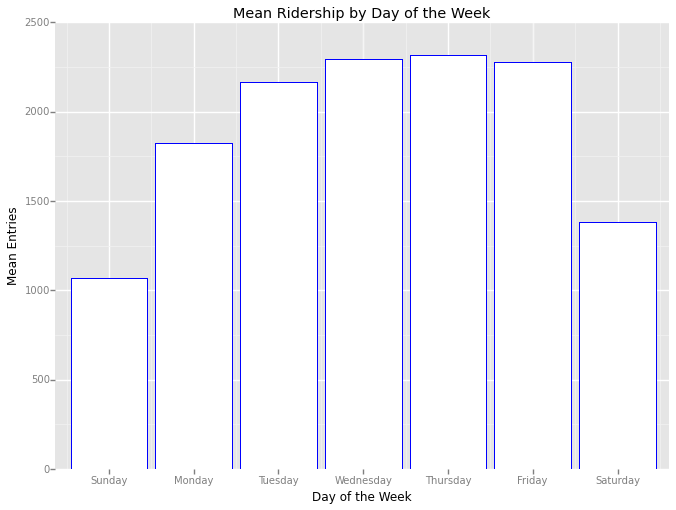

<ggplot: (284446941)>


In [24]:
dates_list = turnstile_weather['DATEn']
turnstile_weather['DOW'] = [datetime.strptime(d, "%m-%d-%y").strftime("%w") for d in dates_list]
ts_blocks = turnstile_weather.groupby(['DOW'])['ENTRIESn_hourly'].mean()
df = pandas.DataFrame(ts_blocks) 
g = ggplot.ggplot(df.reset_index(), ggplot.aes(x='DOW', y='ENTRIESn_hourly')) + \
    geom_bar(stat = "identity", color="blue", fill="white") + \
    scale_x_continuous(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']) + \
    xlab ("Day of the Week") + \
    ylab ("Mean Entries") + \
    ggtitle ("Mean Ridership by Day of the Week")
print df
print g

The bar chart above shows the mean ridership by the day of the week. As expected, Saturday and Sunday have much less volume than do the weekdays because so many commuters use the subway system to get to work, but many of them do not work on weekends. Monday's average ridership is a little lower than the other weekdays. This probably has to do with the fact that the Memorial Day holiday falls on the last Monday of May, making that one Monday more like a weekend day with fewer commuters than a regular working weekday.

### Section 4. Conclusion

*Please address the following questions in detail. Your answers should be 1-2 paragraphs long.*  
#### 4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  


More people ride the NYC subway when it is raining versus when it is not raining. 

#### 4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.


First, we know that the two distributions of data are significantly different, based on the Mann-Whitney U-test detailed above. Then, to figure out which one is greater, we can use descriptive statistics like the mean and median to find out which sample--Rain or No Rain--is greater than the other. In this study, Rain's mean of 2,028 and median of 939 are greater than No Rain's mean of 1,846 and median of 893. This information strongly suggests that the Rain sample is "winning" more of the Mann-Whitney pairwise comparisons than the No Rain sample.

Furthermore, the coefficient of rain in the regression model is 49.3, illustrating that ridership is higher with the presence of rain, all other factors being equal.

### Section 5. Reflection

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.
#### 5.1 Please discuss potential shortcomings of the methods of your analysis, including: Dataset, Analysis, such as the linear regression model or statistical test.  
Potential shortcomings:  
* My analysis does not take into account the Memorial Day holiday, which falls on the last Monday of May. This holiday should probably be grouped in with weekends, because to group it with a standard Monday workday fails to account for the true nature of that day.  
* In May 2011, it only rained on nine of the 31 days of the month. And in some cases it rained at some stations but not others. Furthermore, three of those nine days are Sundays and one more is a Saturday. So rainy days are not distributed equally with respect to the days of the week or the station. Therefore, the data may overstate the effect on rain on ridership because it is weighted towards weekend days going somewhere on the subway is more optional than on weekdays, when going to work is less of a choice and more of an obligation.
* In the case of a skewed distribution, the Mann-Whitney U-test is better for comparing the medians of two samples versus the means. That's why I included the median among my descriptive statistics above. 
* A lot of the data in the two samples--especially in the middle of the night at less crowded stations--show zero riders during given hours. Since this is the case during both rainy and non-rainy days, this can lead to a lot of "ties" in the Mann-Whitney pairwise comparisons, resulting in distortion of Mann-Whitney test.
* In pursuit of the highest possible R2, the linear regression model I ended up with might have too many factors, leading to a model that is "[overfit](http://blog.minitab.com/blog/adventures-in-statistics/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables)," meaning the model starts to model the noise in the data. Some of the increase in R2 by adding these other factors could be due to randomness.

#### 5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?

I wish I did. All of the above beat me up so much I have nothing left to give. :-)